In [2]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 68.0 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima

In [4]:
dataset = pd.read_csv('AirPassengers.csv')

In [5]:
dataset.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [6]:
dataset

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [13]:
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')

In [14]:
from ast import parse
dataset = pd.read_csv('AirPassengers.csv', parse_dates = ['Month'], index_col = 'Month', date_parser = dateparse)

<ipython-input-14-79d65e5eb841>:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  dataset = pd.read_csv('AirPassengers.csv', parse_dates = ['Month'], index_col = 'Month', date_parser = dateparse)


In [15]:
dataset

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [16]:
time_series = dataset['#Passengers'] #Agora temos somente 1 coluna, e o mes é o index

In [17]:
time_series

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [18]:
time_series[1]

<ipython-input-18-a0047bf9d40f>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  time_series[1]


118

In [19]:
time_series['1949-02']

,#Passengers
Month,
1949-02-01,118


In [20]:
time_series[datetime(1949,2,1)]

118

In [21]:
time_series['1950-01-01':'1950-07-31'] #entre datas

,#Passengers
Month,
1950-01-01,115
1950-02-01,126
1950-03-01,141
1950-04-01,135
1950-05-01,125
1950-06-01,149
1950-07-01,170


In [22]:
time_series[:'1950-07-31'] #todos os registros até a data estipulada

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


In [29]:
time_series['1951']

,#Passengers
Month,
1951-01-01,145
1951-02-01,150
1951-03-01,178
1951-04-01,163
1951-05-01,172
1951-06-01,178
1951-07-01,199
1951-08-01,199
1951-09-01,184


In [31]:
time_series.index.max() #pegando o ultimo registro

Timestamp('1960-12-01 00:00:00')

In [32]:
time_series.index.min() #pegando o primeiro registro

Timestamp('1949-01-01 00:00:00')

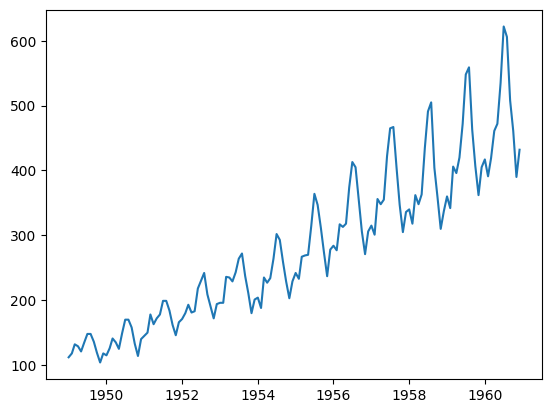

In [33]:
plt.plot(time_series) #serie temporal com tendencia de crescimento

<ipython-input-34-b060fa193344>:3: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  porAno = time_series.resample('A').sum()


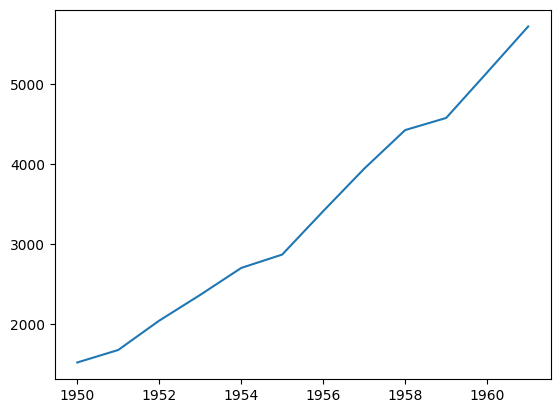

In [34]:
#fazendo um agrupamento por ano

porAno = time_series.resample('A').sum() #A é o somatorio por ano
plt.plot(porAno)

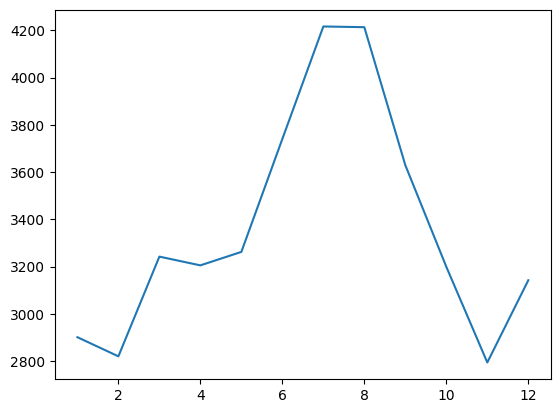

In [36]:
porMes = time_series.groupby([lambda x: x.month]).sum() #somando por mes, todos janeiros de todos os anos
plt.plot(porMes)

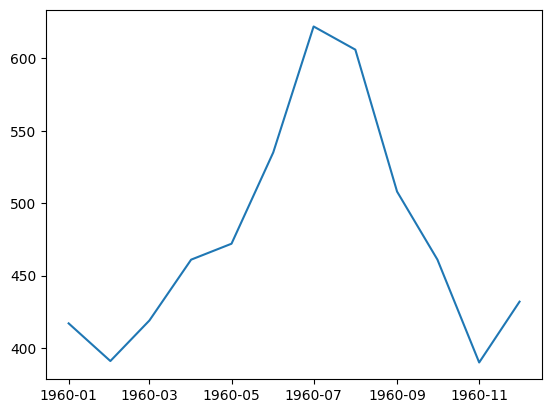

In [40]:
#Grafico de um ano em especifico

porData = time_series['1960-01-01':'1960-12-31']
plt.plot(porData)

#Observe que a soma de todos os registros

In [46]:
#DECOMPONDO A SÉRIE TEMPORAL
decomposicao = seasonal_decompose(time_series) #Esta é uma decomposição ingênua. Métodos mais sofisticados devem ser preferidos.
#Por padrão, é feito o método aditivo

tendencia = decomposicao.trend #Exemplo dos valores diminuirem ou aumentarem ao longo do tempo
sazonal = decomposicao.seasonal #Efeito sazonal
aleatorio = decomposicao.resid #

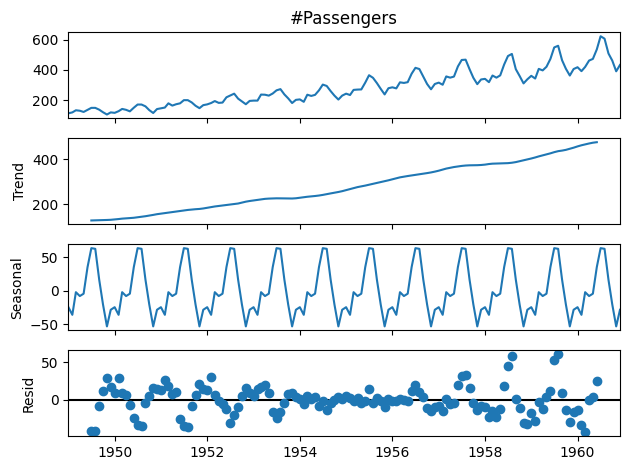

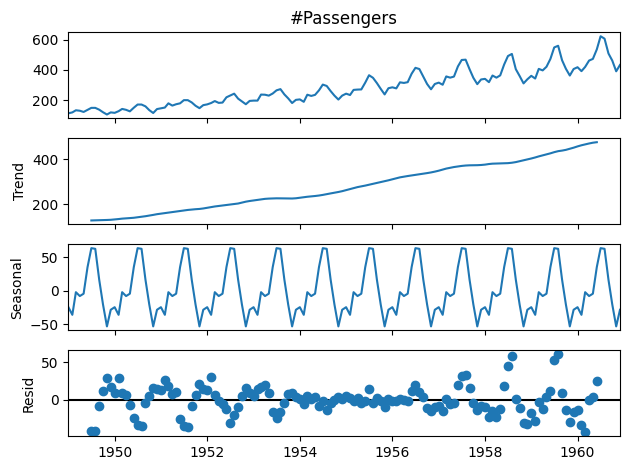

In [48]:
decomposicao.plot()

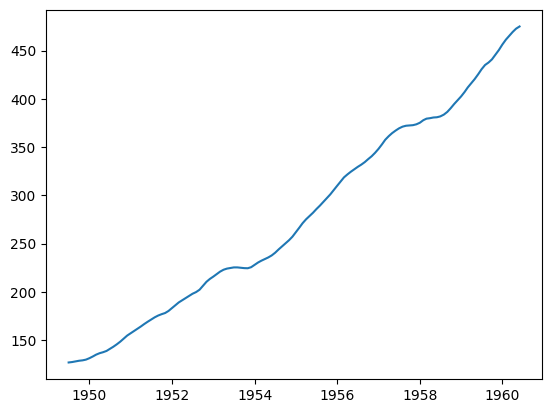

In [49]:
plt.plot(tendencia) #Tendencia de crescimento

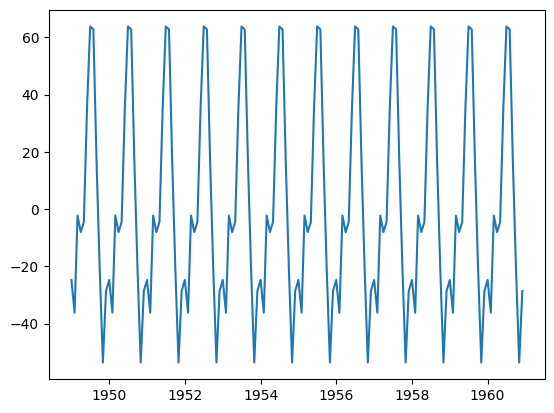

In [43]:
plt.plot(sazonal) #Padrão de pico durante o intervalo

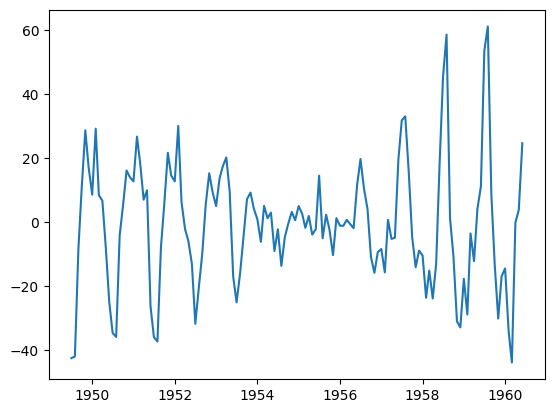

In [44]:
plt.plot(aleatorio) #apresenta os periodos com acontecimentos aleatórios, que indica fuga da linha de tendencia

In [ ]:
#PREDIÇÃO COM ARIMA

In [51]:
model = auto_arima(time_series)

In [52]:
model.order

(4, 1, 3)

In [55]:
predicoes = model.predict(n_periods=14) #predição para os 12 meses seguintes, após a ultimo registro. No caso, 12 meses de 1961

In [56]:
predicoes

,0
1961-01-01,467.573736
1961-02-01,490.494460
1961-03-01,509.136849
1961-04-01,492.554702
1961-05-01,495.305965
1961-06-01,475.947817
1961-07-01,476.339865
1961-08-01,475.552147
1961-09-01,472.353805
1961-10-01,483.889647


In [57]:
len(time_series)

144

In [58]:
train = time_series[:130]
train.shape

(130,)

In [59]:
train.index.min(), train.index.max()

(Timestamp('1949-01-01 00:00:00'), Timestamp('1959-10-01 00:00:00'))

In [60]:
test = time_series[130:]
test.shape

(14,)

In [61]:
test.index.min(), test.index.max()

(Timestamp('1959-11-01 00:00:00'), Timestamp('1960-12-01 00:00:00'))

In [62]:
model2 = auto_arima(train, suppress_warnings=True)

In [63]:
predicoes = pd.DataFrame(model2.predict(n_periods=14), index= test.index) #14 POR QUE SÃO 14 DATAS PRA FRENTE E QUE JA CONHECEMOS
predicoes.columns = ['passengers_preditos']
predicoes

,passengers_preditos
Month,
1959-11-01,357.690511
1959-12-01,334.857449
1960-01-01,342.488592
1960-02-01,375.944534
1960-03-01,424.126300
1960-04-01,473.151468
1960-05-01,510.388415
1960-06-01,527.724284
1960-07-01,523.268370


In [64]:
test

,#Passengers
Month,
1959-11-01,362
1959-12-01,405
1960-01-01,417
1960-02-01,391
1960-03-01,419
1960-04-01,461
1960-05-01,472
1960-06-01,535
1960-07-01,622


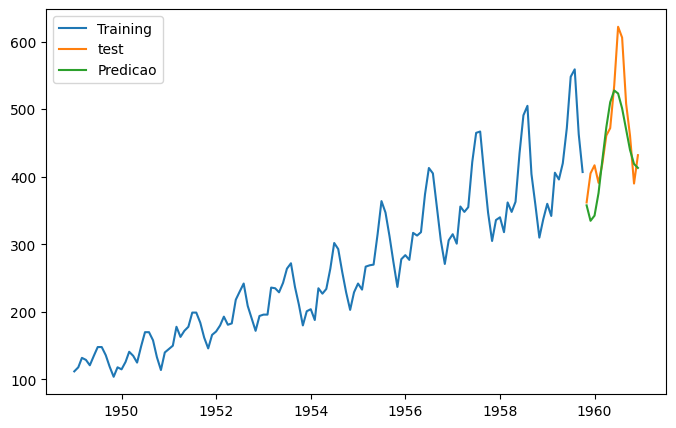

In [66]:
plt.figure(figsize=(8,5))
plt.plot(train, label='Training')
plt.plot(test, label = 'test')
plt.plot(predicoes, label = 'Predicao')
plt.legend();

UTILIZANDO O FACEBOOK PROPHET

In [68]:
#Base de dados é o numero de acessos na pagina https://pt.wikipedia.org/wiki/Peyton_Manning

In [71]:
!pip install prophet

In [73]:
from prophet import Prophet

In [74]:
dataset = pd.read_csv('page_wikipedia.csv')

In [75]:
dataset

,date,views
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572
...,...,...
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871


array([[<Axes: title={'center': 'views'}>]], dtype=object)

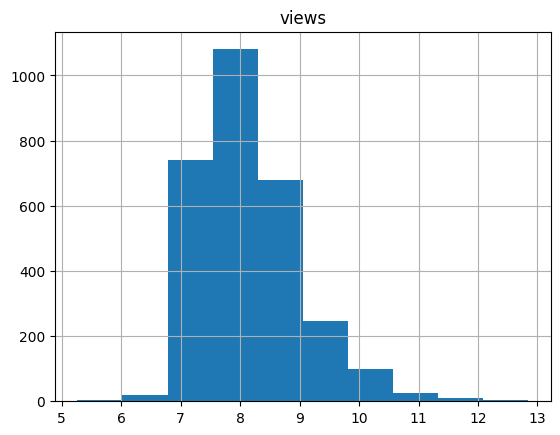

In [76]:
dataset.hist()

In [77]:
dataset.describe()

,views
count,2905.000000
mean,8.138958
std,0.845957
min,5.262690
25%,7.514800
50%,7.997999
75%,8.580168
max,12.846747


In [78]:
#padronizando a entrada de acordo com o Prophet
dataset = dataset[['date', 'views']].rename(columns = {'date': 'ds', 'views':'y'})
dataset

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572
...,...,...
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871


In [79]:
dataset = dataset.sort_values(by = 'ds')
dataset

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572
...,...,...
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871


In [80]:
#REALIZANDO AS PREVISOES

model = Prophet()
model.fit(dataset)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcmkd8p6k/89y0ddu8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcmkd8p6k/k5x9h_ve.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80961', 'data', 'file=/tmp/tmpcmkd8p6k/89y0ddu8.json', 'init=/tmp/tmpcmkd8p6k/k5x9h_ve.json', 'output', 'file=/tmp/tmpcmkd8p6k/prophet_modelll_h11_u/prophet_model-20241021212759.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:27:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:28:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [81]:
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)

In [82]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2007-12-10,8.041704,8.233109,9.475373,8.041704,8.041704,0.802946,0.802946,0.802946,0.352288,0.352288,0.352288,0.450658,0.450658,0.450658,0.0,0.0,0.0,8.844650
1,2007-12-11,8.040157,8.010374,9.207126,8.040157,8.040157,0.553024,0.553024,0.553024,0.119636,0.119636,0.119636,0.433389,0.433389,0.433389,0.0,0.0,0.0,8.593182
2,2007-12-12,8.038611,7.850778,9.028387,8.038611,8.038611,0.350386,0.350386,0.350386,-0.066669,-0.066669,-0.066669,0.417055,0.417055,0.417055,0.0,0.0,0.0,8.388997
3,2007-12-13,8.037064,7.720971,9.027677,8.037064,8.037064,0.329846,0.329846,0.329846,-0.072254,-0.072254,-0.072254,0.402100,0.402100,0.402100,0.0,0.0,0.0,8.366910
4,2007-12-14,8.035517,7.738335,8.937100,8.035517,8.035517,0.319356,0.319356,0.319356,-0.069575,-0.069575,-0.069575,0.388931,0.388931,0.388931,0.0,0.0,0.0,8.354874


In [83]:
len(dataset), len(forecast)

(2905, 2995)

In [84]:
len(forecast) - len(dataset)

90

In [85]:
forecast.tail(90)
#Trend = tendencia
#yhat lower = valor minimo
#yhatupper = valor maximo
#trend lower = tendencia minima
#trend upper = tendencia maxima
#Additive terms = valor da regressão aditiva
#yhat = valor previsto

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2905,2016-01-21,7.559905,7.892591,9.113425,7.559905,7.559905,0.999855,0.999855,0.999855,-0.072254,-0.072254,-0.072254,1.072109,1.072109,1.072109,0.0,0.0,0.0,8.559760
2906,2016-01-22,7.558883,7.976076,9.131274,7.558883,7.558883,1.016860,1.016860,1.016860,-0.069575,-0.069575,-0.069575,1.086435,1.086435,1.086435,0.0,0.0,0.0,8.575743
2907,2016-01-23,7.557862,7.755525,8.951438,7.557862,7.557862,0.786590,0.786590,0.786590,-0.311713,-0.311713,-0.311713,1.098303,1.098303,1.098303,0.0,0.0,0.0,8.344452
2908,2016-01-24,7.556840,8.086926,9.319456,7.556840,7.556840,1.155604,1.155604,1.155604,0.048287,0.048287,0.048287,1.107318,1.107318,1.107318,0.0,0.0,0.0,8.712445
2909,2016-01-25,7.555819,8.444291,9.628566,7.555819,7.555819,1.465356,1.465356,1.465356,0.352288,0.352288,0.352288,1.113068,1.113068,1.113068,0.0,0.0,0.0,9.021175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2990,2016-04-15,7.473079,6.338919,7.540010,7.439397,7.499603,-0.560878,-0.560878,-0.560878,-0.069575,-0.069575,-0.069575,-0.491303,-0.491303,-0.491303,0.0,0.0,0.0,6.912201
2991,2016-04-16,7.472058,6.092213,7.344340,7.437681,7.499036,-0.772927,-0.772927,-0.772927,-0.311713,-0.311713,-0.311713,-0.461214,-0.461214,-0.461214,0.0,0.0,0.0,6.699131
2992,2016-04-17,7.471036,6.478453,7.705865,7.436140,7.498574,-0.383237,-0.383237,-0.383237,0.048287,0.048287,0.048287,-0.431524,-0.431524,-0.431524,0.0,0.0,0.0,7.087799
2993,2016-04-18,7.470015,6.751280,8.052967,7.434122,7.498115,-0.050685,-0.050685,-0.050685,0.352288,0.352288,0.352288,-0.402973,-0.402973,-0.402973,0.0,0.0,0.0,7.419330


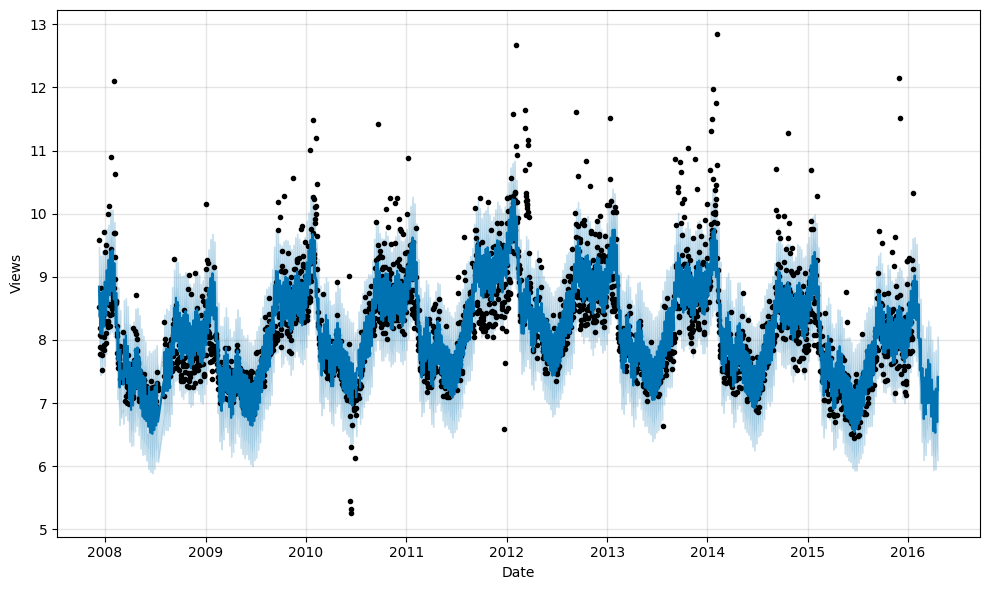

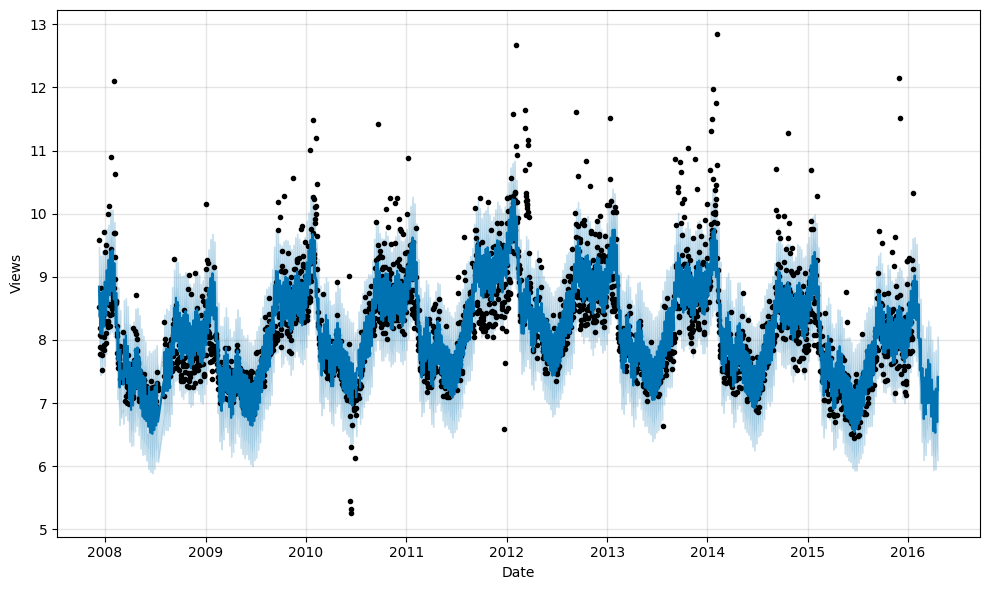

In [86]:
model.plot(forecast, xlabel= 'Date', ylabel='Views') #Os pontos pretos são os valores reais e quando n tem, a linha azul é a previsao

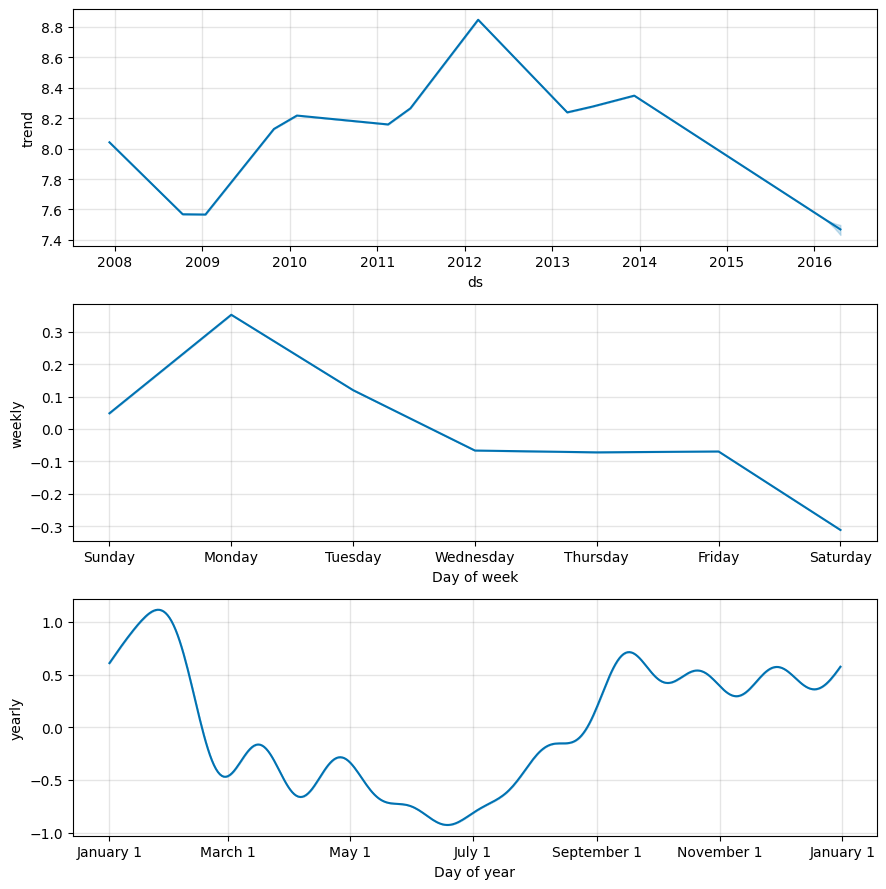

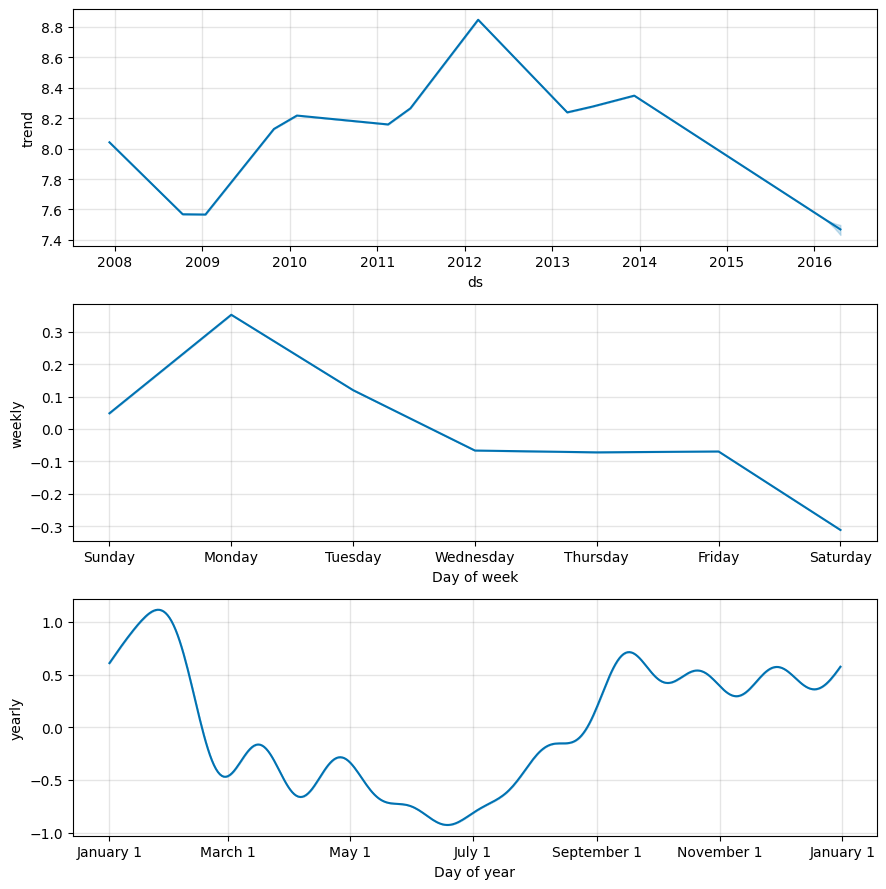

In [87]:
model.plot_components(forecast)
#A tendencia de visualização
# As buscas por dia da semana
# As buscar pelo ano

In [88]:
from prophet.plot import plot_plotly, plot_components_plotly


In [89]:
plot_plotly(model, forecast)

In [90]:
plot_components_plotly(model, forecast)